In [2]:
import numpy as np
from skimage import io, data, transform, util, filters, color, exposure, restoration, measure, feature
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_float64, img_as_ubyte
from scipy import ndimage, fft
import math

In [3]:
def show(img_list, caption_list, Axis=False, rescale = True):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        if rescale:
            ax[i].imshow(img_list[i], cmap='gray')
        else:
            if np.max(img_list[i]) <= 1:
                ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=1)
            else:
                ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [4]:
img = io.imread('D://Dropbox//UFOP//BCC326//test//png//letra.png')
print(img.shape)

(222, 304)


# Etiquetado de objetos

<p>
<b>skimage.measure.label</b>(label_image, background=None, return_num=False, connectivity=None): Label connected regions of an integer array. Two pixels are connected when they are neighbors and have the same value. In 2D, they can be neighbors either in a 1- or 2-connected sense (connection-4, connection-8). 

<ul>
    <li> label_image: ndarray of dtype int. Image to label.</li>
    <li> background: int, optional. Consider all pixels with this value as background pixels, and label them as 0. By default, 0-valued pixels are considered as background pixels.</li>
    <li> return_num: bool, optional. Whether to return the number of assigned labels.</li>
    <li> connectivity: int, optional. Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor. Accepted values are ranging from 1 to input.ndim. If None, a full connectivity of input.ndim is used.</li>  
</ul>
Returns
<ul>
    <li> labels: ndarray of dtype int. Labeled array, where all connected regions are assigned the same integer value.</li>
    <li> numint, optional. Number of labels, which equals the maximum label index and is only returned if return_num is True.</li>
</ul>
</p>


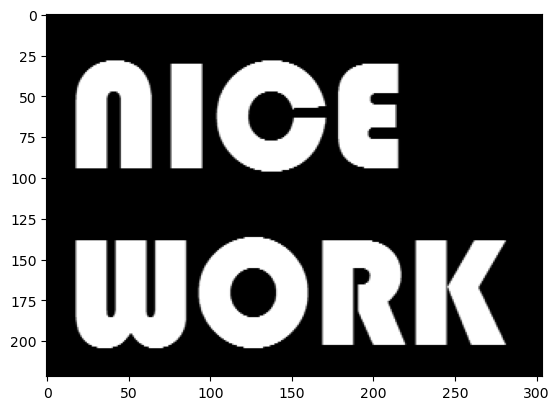

In [5]:
plt.imshow(img, cmap='gray')

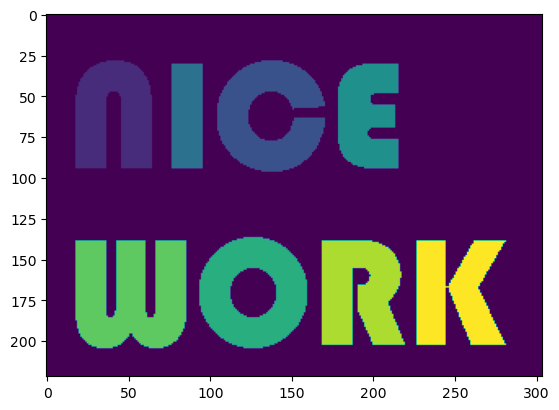

In [6]:
img_l = measure.label(img > 128)
plt.imshow(img_l)

In [7]:
print(img_l[50:56, 15:35])
print(img_l[50:56, 70:95])

[[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


## Propriedades de região

<p>
<b>skimage.measure.regionprops</b>(label_image, intensity_image=None, cache=True, extra_properties=None)
Measure properties of labeled image regions.

<ul>
    <li> label_image: (M, N[, P]) ndarray. Labeled input image. Labels with value 0 are ignored.</li>
    <li> intensity_image: (M, N[, P][, C]) ndarray, optional. Intensity (i.e., input) image with same size as labeled image, plus optionally an extra dimension for multichannel data. Currently, this extra channel dimension, if present, must be the last axis. Default is None.</li>
    <li> cache: bool, optional. Determine whether to cache calculated properties. The computation is much faster for cached properties, whereas the memory consumption increases.</li>
    <li> extra_properties: Iterable of callables. Add extra property computation functions that are not included with skimage. </li>


</ul>
Returns
<ul>
    <li> properties: list of RegionProperties. Each item describes one labeled region, and can be accessed using the attributes listed below.</li>
</ul>
</p>


<table>
  <tr>
    <th>Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td> area: int</td>
    <td> Number of pixels of the region.</td>
  </tr>
  <tr>
    <td>area_bbox: int</td>
    <td>Number of pixels of bounding box.</td>
  </tr>
  <tr>
    <td> area_convex: int</td>
    <td> Number of pixels of convex hull image, which is the smallest convex polygon that encloses the region.</td>
  </tr>
  <tr>
    <td> area_filled: int</td>
    <td> Number of pixels of the region will all the holes filled in. Describes the area of the image_filled.</td>
  </tr>
  <tr>
    <td> axis_major_length: float</td>
    <td> The length of the major axis of the ellipse that has the same normalized second central moments as the region.</td>
  </tr>
  <tr>
    <td> axis_minor_length: float</td>
    <td> The length of the minor axis of the ellipse that has the same normalized second central moments as the region.</td>
  </tr>
  <tr>
    <td> bbox: tuple</td>
    <td> Bounding box (min_row, min_col, max_row, max_col). Pixels belonging to the bounding box are in the half-open interval [min_row; max_row) and [min_col; max_col).</td>
  </tr>
  <tr>
    <td> centroid: array</td>
    <td> Centroid coordinate tuple (row, col).</td>
  </tr>
  <tr>
    <td> centroid_local: array</td>
    <td> Centroid coordinate tuple (row, col), relative to region bounding box.</td>
  </tr>
  <tr>
    <td> centroid_weighted: array</td>
    <td> Centroid coordinate tuple (row, col) weighted with intensity image.</td>
  </tr>
  <tr>
    <td> centroid_weighted_local: array</td>
    <td> Centroid coordinate tuple (row, col), relative to region bounding box, weighted with intensity image.</td>
  </tr>
  <tr>
    <td> coords: (N, 2) ndarray</td>
    <td> Coordinate list (row, col) of the region.</td>
  </tr>
  <tr>
    <td> eccentricity: float</td>
    <td> Eccentricity of the ellipse that has the same second-moments as the region. The eccentricity is the ratio of the focal distance (distance between focal points) over the major axis length. The value is in the interval [0, 1). When it is 0, the ellipse becomes a circle.</td>
  </tr>
  <tr>
    <td> equivalent_diameter_area: float</td>
    <td> The diameter of a circle with the same area as the region.</td>
  </tr>
  <tr>
    <td> euler_number: int</td>
    <td> Euler characteristic of the set of non-zero pixels. Computed as number of connected components subtracted by number of holes (input.ndim connectivity). In 3D, number of connected components plus number of holes subtracted by number of tunnels.</td>
  </tr>
  <tr>
    <td> extent: float</td>
    <td> Ratio of pixels in the region to pixels in the total bounding box. Computed as area / (rows * cols)</td>
  </tr>
  <tr>
    <td> feret_diameter_max: float</td>
    <td> Maximum Feret’s diameter computed as the longest distance between points around a region’s convex hull contour as determined by find_contours.</td>
  </tr>
  <tr>
    <td> image: (H, J) ndarray</td>
    <td> Sliced binary region image which has the same size as bounding box.</td>
  </tr>
  <tr>
    <td> image_convex: (H, J) ndarray</td>
    <td> Binary convex hull image which has the same size as bounding box.</td>
  </tr>
  <tr>
    <td> image_filled: (H, J) ndarray</td>
    <td> Binary region image with filled holes which has the same size as bounding box.</td>
  </tr>
  <tr>
    <td> image_intensity: ndarray</td>
    <td> Image inside region bounding box.</td>
  </tr>
  <tr>
    <td> inertia_tensor: ndarray</td>
    <td> Inertia tensor of the region for the rotation around its mass.</td>
  </tr>
  <tr>
    <td> inertia_tensor_eigvals: tuple</td>
    <td> The eigenvalues of the inertia tensor in decreasing order.</td>
  </tr>
  <tr>
    <td> intensity_max: float</td>
    <td> Value with the greatest intensity in the region.</td>
  </tr>
  <tr>
    <td> intensity_mean: float</td>
    <td> Value with the mean intensity in the region.</td>
  </tr>
  <tr>
    <td> intensity_min: float</td>
    <td> Value with the least intensity in the region.</td>
  </tr>
  <tr>
    <td> label: int</td>
    <td> The label in the labeled input image.</td>
  </tr>
  <tr>
    <td> moments: (3, 3) ndarray</td>
    <td> Spatial moments up to 3rd order: $m_ij = sum{ array(row, col) * row^i * col^j $</td>
  </tr>
  <tr>
    <td> moments_central: (3, 3) ndarray</td>
    <td> Central moments (translation invariant) up to 3rd order: $mu_{ij} = \sum{ array(row, col) * (row - row_c)^i * (col - col_c)^j$</td>
  </tr>
  <tr>
    <td> moments_hu: tuple</td>
    <td> Hu moments (translation, scale and rotation invariant).</td>
  </tr>
  <tr>
    <td> moments_normalized: (3, 3) ndarray</td>
    <td> Normalized moments (translation and scale invariant) up to 3rd order: $nu_{ij} = mu_{ij} / m_00^{(i+j)/2 + 1}$</td>
  </tr>
  <tr>
    <td> moments_weighted: (3, 3) ndarray</td>
    <td> Spatial moments of intensity image up to 3rd order: $wm_{ij} = \sum{ array(row, col) * row^i * col^j }$</td>
  </tr>
  <tr>
    <td> moments_weighted_central: (3, 3) ndarray</td>
    <td> Central moments (translation invariant) of intensity image up to 3rd order</td>
  </tr>
  <tr>
    <td> moments_weighted_hu: tuple</td>
    <td> Hu moments (translation, scale and rotation invariant) of intensity image.</td>
  </tr>
  <tr>
    <td> moments_weighted_normalized: (3, 3) ndarray</td>
    <td> Normalized moments (translation and scale invariant) of intensity image up to 3rd order</td>
  </tr>
  <tr>
    <td> orientation: float</td>
    <td> Angle between the 0th axis (rows) and the major axis of the ellipse that has the same second moments as the region, ranging from -pi/2 to pi/2 counter-clockwise.</td>
  </tr>
  <tr>
    <td> perimeter: float</td>
    <td> Perimeter of object which approximates the contour as a line through the centers of border pixels using a 4-connectivity.</td>
  </tr>
  <tr>
    <td> perimeter_crofton: float</td>
    <td> Perimeter of object approximated by the Crofton formula in 4 directions.</td>
  </tr>
  <tr>
    <td> slice: tuple of slices</td>
    <td> A slice to extract the object from the source image.</td>
  </tr>
  <tr>
    <td> solidity: float</td>
    <td> Ratio of pixels in the region to pixels of the convex hull image.</td>
  </tr>

</table>

Each region also supports iteration, so that you can do:

for prop in region:
    print(prop, region[prop])

In [7]:
from skimage.draw import ellipse

In [8]:
image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = transform.rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = measure.label(image)
regions = measure.regionprops(label_img)

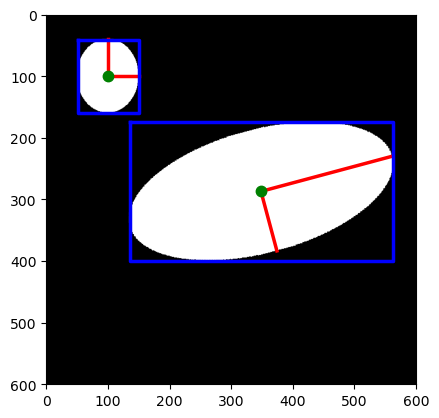

In [9]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

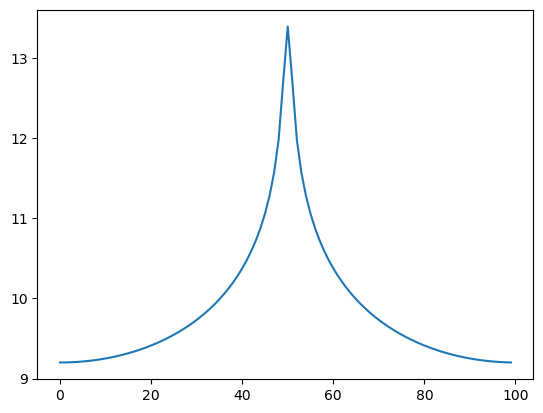

In [10]:
x = np.arange(0, 100)
m = ( (-1)**x )
y = 2*x**2
fy = fft.fft(y*m)
#fy = fft.fft(y)
plt.plot(np.log(np.abs(fy)+1))


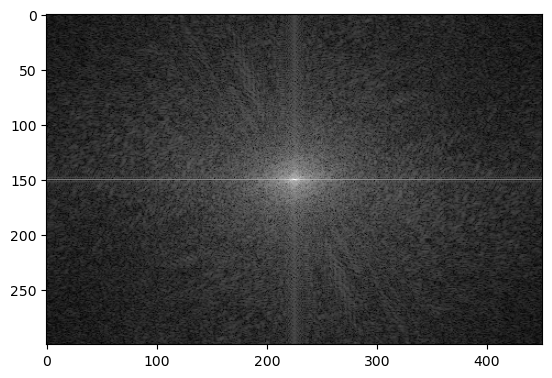

In [11]:
img= color.rgb2gray( data.chelsea() )
lin, col = img.shape[:2]
x = np.arange(col)
y = np.arange(lin)
u, v = np.meshgrid(x, y)
c  = (-1)**(u+v)

f = fft.fft2(util.img_as_float(img)*c)
#f = fft.fft2(util.img_as_float(img))
plt.imshow( np.log( np.abs(f) + 1 ), cmap='gray')

# Fourier descriptor

$$s(k) = x(k) + jy(k)$$
onde $k=0,1,2,3,\ldots$ es el número de puntos, $x$ es la coordenada real y, $y$ es la coordenada imaginaria

In [16]:
def frdescp(s):
    lin, col = s.shape[:2]
    if col != 2:
        print('S must be of size lin-by-2')
    if lin/2 != int(lin/2):
        s = np.append(s, [s[-1,:]], axis=0)
        lin += 1
    x = np.arange(0, lin)
    m = ( (-1)**x )
    # centraliza
    s[:,0] = m * s[:,0]
    s[:,1] = m * s[:,1]

    ns = s[:,0] +  1j*s[:,1]
    
    z = fft.fft(ns)

    return z


In [12]:
def ifrdescp(z, nd = None):
    n = np.prod(z.shape)
    if nd is None:
        nd = n
    
    if n/2 != int(n/2):
        print('length(z) must be an even number')
    elif nd/2 != int(nd/2):
        print('nd must be an even number')

    x = np.arange(0, n)
    m = ( (-1)**x )

    # because the descp is centered, (n-nd)/2 terms
    # from each end of the sequence are set to 0
    d = int( (n - nd) / 2 )
    z[:d] = 0
    z[n-d:] = 0

    zz = fft.ifft(z)
    s = np.zeros( (n,2) )
    s[:,0] = zz.real
    s[:,1] = zz.imag

    s[:,0] = m * s[:,0]
    s[:,1] = m * s[:,1]

    return s

In [13]:
def bound2img(coord, m=None, n=None):

    ncoord = coord.copy().astype(int)

    if m is None and n is None:
        delta = 20
        m = np.max( coord[:,0] )  -  np.min( coord[:,0] ) + delta
        n = np.max( coord[:,1] )  -  np.min( coord[:,1] ) + delta

    nimg = np.zeros((m+1, n+1), dtype=bool)
    x = ncoord[:, 0]
    y = ncoord[:, 1]
    nimg[ x, y] = True

    #x = nz[:,0].copy().astype(int)
    #y = nz[:,1].copy().astype(int)
    return nimg

In [14]:
bat = io.imread('D://Dropbox//UFOP//BCC326//test//png//morcego.png')
bat = color.rgb2gray(bat)
bat_bin  = bat > 0.5
bat_bin = measure.label(bat_bin)

https://sabopy.com/py/scikit-image-72/

1
(573, 2)


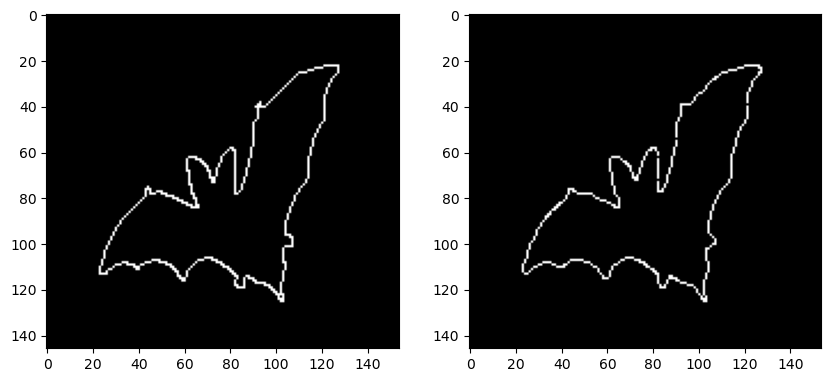

In [20]:
coord = measure.find_contours(bat_bin, fully_connected='low')

fig, ax = plt.subplots(1,2,figsize=(10,10))
#ax.imshow(, cmap=plt.cm.gray)

print(len(coord))
ncoord = np.empty(shape=[0, 2])

for contour in coord:
    ncoord = np.append(ncoord, contour, axis=0)

lin, col = bat.shape[:2]
print(ncoord.shape)
nimg2 = bound2img(ncoord, lin, col)
ax[0].imshow(nimg2, cmap=plt.cm.gray)

z = frdescp(ncoord)
nz = ifrdescp(z, 100)


nimg = bound2img(nz, lin, col)
ax[1].imshow(nimg, cmap='gray')

### Momentos de Hu

<p>
<b>skimage.measure.moments_hu</b>(nu): Calculate Hu’s set of image moments (2D-only). Note that this set of moments is proofed to be translation, scale and rotation invariant.

<ul>
    <li> nu: (M, M) array. Normalized central image moments, where M must be >= 4.</li>
</ul>
Returns
<ul>
    <li> nu: (7,) array. Hu’s set of image moments.</li>
</ul>
</p>

<p>
<b>skimage.measure.moments_normalized</b>(mu, order=3): Calculate all normalized central image moments up to a certain order. Note that normalized central moments are translation and scale invariant but not rotation invariant.

<ul>
    <li> mu: (M,[ …,] M) array. Central image moments, where M must be greater than or equal to order.</li>
    <li> order: int, optional. Maximum order of moments. Default is 3.</li>
</ul>
Returns
<ul>
    <li> nu: (order + 1,[ …,] order + 1) array. Normalized central image moments.</li>
</ul>
</p>

<p>
<b>skimage.measure.moments_central</b>(image, center=None, order=3, **kwargs): Calculate all central image moments up to a certain order.
The center coordinates (cr, cc) can be calculated from the raw moments as: {M[1, 0] / M[0, 0], M[0, 1] / M[0, 0]}. Note that central moments are translation invariant but not scale and rotation invariant.

<ul>
    <li> image: nD double or uint8 array. </li>
    <li> center: tuple of float, optional. Coordinates of the image centroid. This will be computed if it is not provided.</li>
    <li> order: int, optional. The maximum order of moments computed.</li>
</ul>
Returns
<ul>
    <li> mu (order + 1, order + 1) array. Central image moments.</li>
</ul>
</p>



In [22]:
def Hu_moments(img):
  momentos_centrais = measure.moments_central(img)
  momentos_normalizados = measure.moments_normalized(momentos_centrais)
  momentos_hu = measure.moments_hu(momentos_normalizados)
  return momentos_hu

[[ 2.81094216e-01  2.83863809e-02  1.15104425e-02  9.06810592e-04
   5.89812715e-07 -1.25159198e-05 -2.86969921e-06]
 [ 2.81165038e-01  2.83815803e-02  1.15095233e-02  9.06644954e-04
   5.90643092e-07 -1.24708265e-05 -2.86858951e-06]
 [ 2.81172385e-01  2.83836313e-02  1.15105446e-02  9.06675625e-04
   5.88545895e-07 -1.25420728e-05 -2.86930489e-06]
 [ 2.81068615e-01  2.83556022e-02  1.14924045e-02  8.89356358e-04
   4.77944562e-07 -1.68392378e-05 -2.80281878e-06]
 [ 2.81396894e-01  2.84923329e-02  1.15087368e-02  9.12774793e-04
   6.15240085e-07 -1.18275819e-05 -2.89373575e-06]
 [ 2.81167991e-01  2.83978972e-02  1.14989255e-02  8.99769532e-04
   5.40623257e-07 -1.45014332e-05 -2.84323847e-06]]


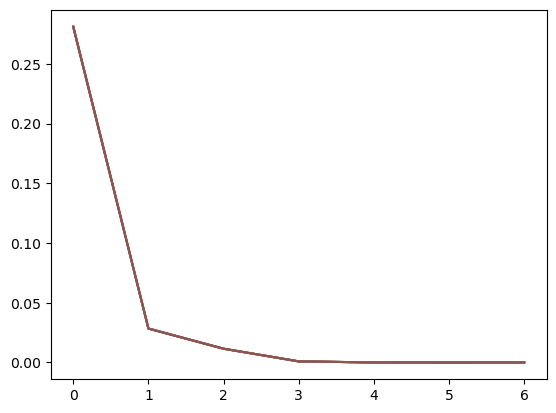

In [23]:
bat = io.imread('D://Dropbox//UFOP//BCC326//test//png//morcego.png')
bat = color.rgb2gray(bat)
N = 6
hu_moments = np.zeros((N, 7))

rot = [0, 23, 43]
for i in range( int(N/2) ):
    nimg = transform.rotate(bat, rot[i])
    hu_moments[i,:] = Hu_moments(nimg)

scale = [0.9, 0.75, 0.6]
for i in range(int( N/2) ):
    nimg = transform.rescale(bat, scale[i] )
    hu_moments[i+3,:] = Hu_moments(nimg)

print(hu_moments)
for i in range(N):
    plt.plot(hu_moments[i,:])

#hu_moments = hu_moments / np.max(hu_moments, axis=0)
#goose = io.imread('D://Dropbox//UFOP//BCC326//test//png//goose.png')
#goose = color.rgb2gray(goose)

#mom_cen = measure.moments_central(goose)
#mom_hu = measure.moments_hu(mom_cen)

#plt.plot(np.log(mom_hu))


$$H_i = -sign(h_i)\log{|h_i|}$$

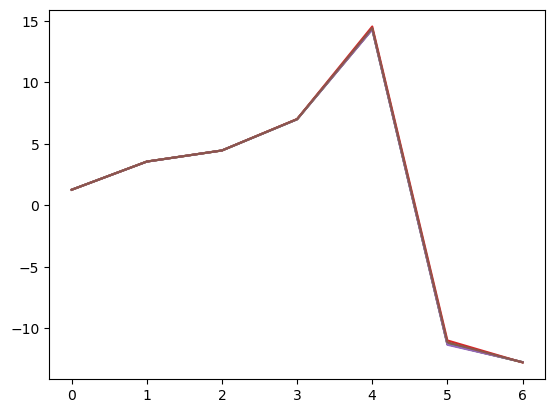

In [24]:

def sign_mom(h):
    h = -np.sign(h)*np.log(np.abs(h))
    return h

for i in range(hu_moments.shape[0]):
    plt.plot(sign_mom(hu_moments[i,:]))

### Local Binary Patterns (LBP)
<p>
<b>skimage.feature.local_binary_pattern</b>(image, P, R, method='default'): Gray scale and rotation invariant LBP (Local Binary Patterns). 
LBP is an invariant descriptor that can be used for texture classification.

<ul>
    <li> image: (N, M) array. Graylevel image.</li>
    <li> P: int. Number of circularly symmetric neighbour set points (quantization of the angular space).</li>
    <li> R: float. Radius of circle (spatial resolution of the operator).</li>
    <li> method: {‘default’, ‘ror’, ‘uniform’, ‘var’}. Method to determine the pattern.
        <ul>
        <li> ‘default’: original local binary pattern which is gray scale but not rotation invariant.</li>
        <li> ‘ror’: extension of default implementation which is gray scale and rotation invariant.</li>
        <li> ‘uniform’: improved rotation invariance with uniform patterns and finer quantization of the angular space which is gray scale and rotation invariant.</li>
        <li> ‘nri_uniform’: non rotation-invariant uniform patterns variant which is only gray scale invariant</li>
        <li> ‘var’: rotation invariant variance measures of the contrast of local image texture which is rotation but not gray scale invariant.</li>
        </ul>
    </li>
</ul>
Returns
<ul>
    <li> output(N, M) array. LBP image.</li>
</ul>
</p>

c:\Users\Memo\anaconda3\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


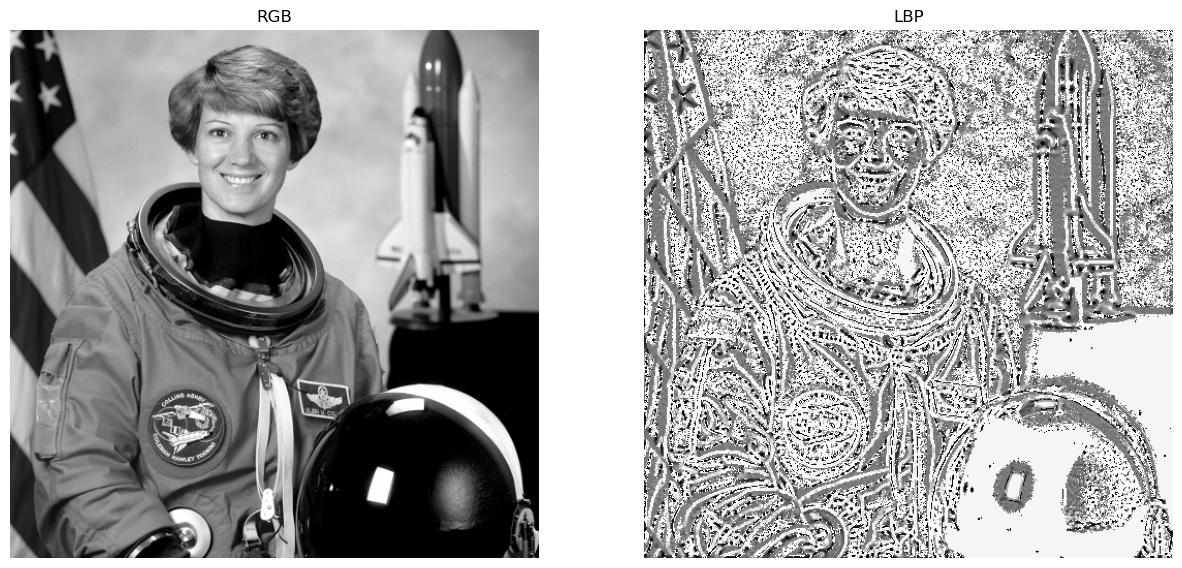

In [25]:
radius = 3
n_points = 8 * radius
img = color.rgb2gray(data.astronaut())
lbp = feature.local_binary_pattern(img, n_points, radius, method='uniform')
show([img, lbp], ['RGB', 'LBP'])
#plt.imshow(lbp, cmap='gray')

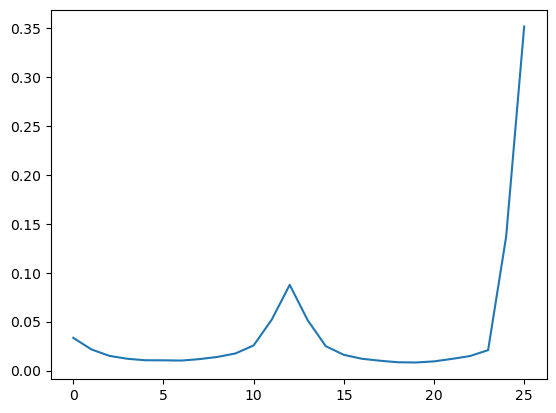

In [26]:
n_bins = int(lbp.max()+1)
h = ndimage.histogram(lbp, min=0, max=n_bins, bins=n_bins)
plt.plot(h/h.sum())

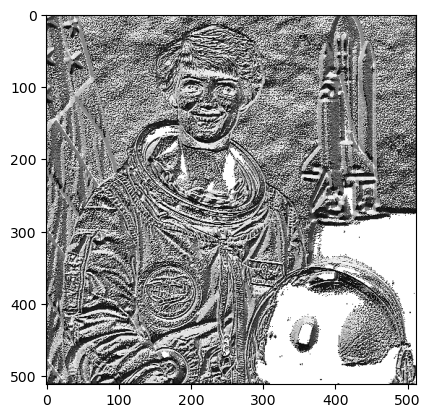

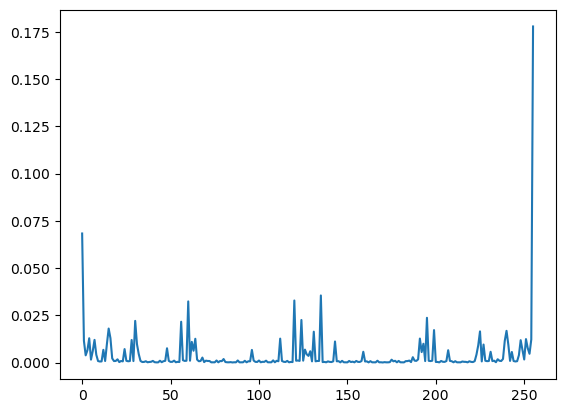

In [27]:
nimg2 = feature.local_binary_pattern(img, 8, 1)
plt.figure()
plt.imshow(nimg2, cmap='gray')
values2, counts2 = np.unique(nimg2, return_counts=True)
counts2 = counts2 / (counts2.sum() + 1e-7)
plt.figure()
plt.plot(counts2)

### Histogram of Oriented Gradients (HoG)

<p>
<b>skimage.feature.hog</b>(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None, channel_axis=None): Extract Histogram of Oriented Gradients (HOG) for a given image.

<ul>
    <li> image: (M, N[, C]) ndarray. Input image.</li>
    <li> orientation: int, optional. Number of orientation bins.</li>
    <li> pixels_per_cell: 2-tuple (int, int), optional. Size (in pixels) of a cell.</li>
    <li> cells_per_block: 2-tuple (int, int), optional. Number of cells in each block.</li>
    <li> block_norm: str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional. </li>
    <li> visualize: bool, optional. Also return an image of the HOG. For each cell and orientation bin, the image contains a line segment that is centered at the cell center, is perpendicular to the midpoint of the range of angles spanned by the orientation bin, and has intensity proportional to the corresponding histogram value.</li>
    <li> transform_sqrt: bool, optional. Apply power law compression to normalize the image before processing. DO NOT use this if the image contains negative values. Also see notes section below.</li>
    <li> feature_vector: bool, optional. Return the data as a feature vector by calling .ravel() on the result just before returning.</li>
    <li> multichannel: boolean, optional. If True, the last image dimension is considered as a color channel, otherwise as spatial. This argument is deprecated: specify channel_axis instead.</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels.</li>
</ul>
Returns
<ul>
    <li> out: (n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient) ndarray. HOG descriptor for the image. If feature_vector is True, a 1D (flattened) array is returned.</li>
    <li> hog_image: (M, N) ndarray, optional. A visualisation of the HOG image. Only provided if visualize is True.</li>
</ul>
</p>

(3780,)


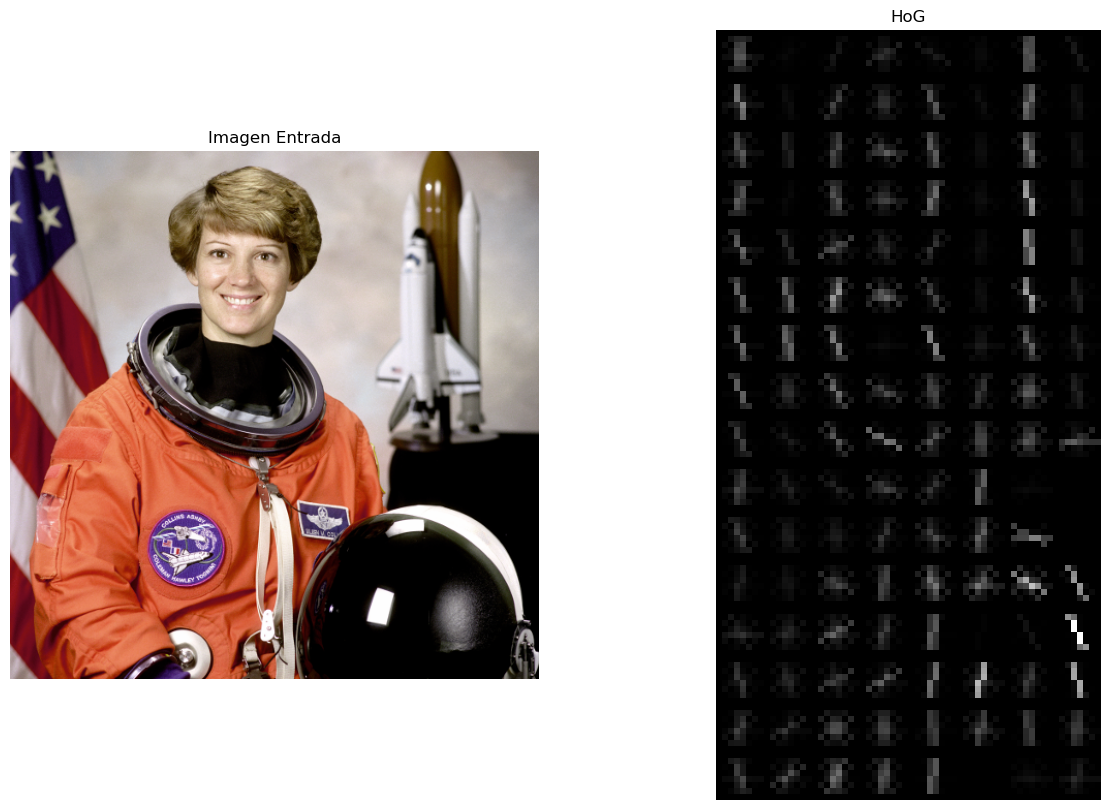

In [28]:
image = data.astronaut()

#fd, hog_image = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),  cells_per_block=(1, 1), visualize=True, channel_axis=-1)
# Imagen rescalada para 128 x 64
fd, hog_image = feature.hog(transform.resize(color.rgb2gray(image), (128,64)), orientations=9, pixels_per_cell=(8, 8),  cells_per_block=(2, 2), visualize=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

show([image, hog_image_rescaled], ['Imagen Entrada', 'HoG'])
print(fd.shape)

### Scale Invariant Feature Transform (SIFT)

<p>
class <b>skimage.feature.SIFT</b>(upsampling=2, n_octaves=8, n_scales=3, sigma_min=1.6, sigma_in=0.5, c_dog=0.013333333333333334, c_edge=10, n_bins=36, lambda_ori=1.5, c_max=0.8, lambda_descr=6, n_hist=4, n_ori=8): Bases: skimage.feature.util.FeatureDetector, skimage.feature.util.DescriptorExtractor. SIFT feature detection and descriptor extraction.

<ul>
    <li> upsampling: int, optional. Prior to the feature detection the image is upscaled by a factor of 1 (no upscaling), 2 or 4. Method: Bi-cubic interpolation.</li>
    <li> n_octaves: int, optional. Maximum number of octaves. With every octave the image size is halved and the sigma doubled. The number of octaves will be reduced as needed to keep at least 12 pixels along each dimension at the smallest scale.</li>
    <li> n_scales: int, optional. Maximum number of scales in every octave.</li>
    <li> sigma_min: float, optional. The blur level of the seed image. If upsampling is enabled sigma_min is scaled by factor 1/upsampling</li>
    <li> sigma_in: float, optional. The assumed blur level of the input image.</li>
    <li> c_dog: float, optional. Threshold to discard low contrast extrema in the DoG. It’s final value is dependent on n_scales by the relation: $final_{c_{dog}} = (2^(1/n_{scales})-1) / (2^(1/3)-1) * c_{dog}$
</li>
    <li> c_edge: float, optional. Threshold to discard extrema that lie in edges. </li>
    <li> n_bins: int, optional. Number of bins in the histogram that describes the gradient orientations around keypoint.</li>
    <li> lambda_ori: float, optional. The window used to find the reference orientation of a keypoint has a width of 6 * lambda_ori * sigma and is weighted by a standard deviation of 2 * lambda_ori * sigma.</li>
    <li> c_max: float, optional. The threshold at which a secondary peak in the orientation histogram is accepted as orientation</li>
    <li> lambda_descr: float, optional. The window used to define the descriptor of a keypoint has a width of 2 * lambda_descr * sigma * (n_hist+1)/n_hist and is weighted by a standard deviation of lambda_descr * sigma.</li>
    <li> n_hist: int, optional. The window used to define the descriptor of a keypoint consists of n_hist * n_hist histograms.</li>
    <li> n_ori: int, optional. The number of bins in the histograms of the descriptor patch.</li>
</ul>
Notes

The SIFT algorithm was developed by David Lowe [1], [2] and later patented by the University of British Columbia. Since the patent expired in 2020 it’s free to use.

Methods

<ul>
    <li> detect(image): Detect the keypoints.</li>
    <li> detect_and_extract(image): Detect the keypoints and extract their descriptors.</li>
    <li> extract(image): Extract the descriptors for all keypoints in the image.</li>
</ul>
</p>

In [29]:
from skimage.feature import match_descriptors, plot_matches, SIFT

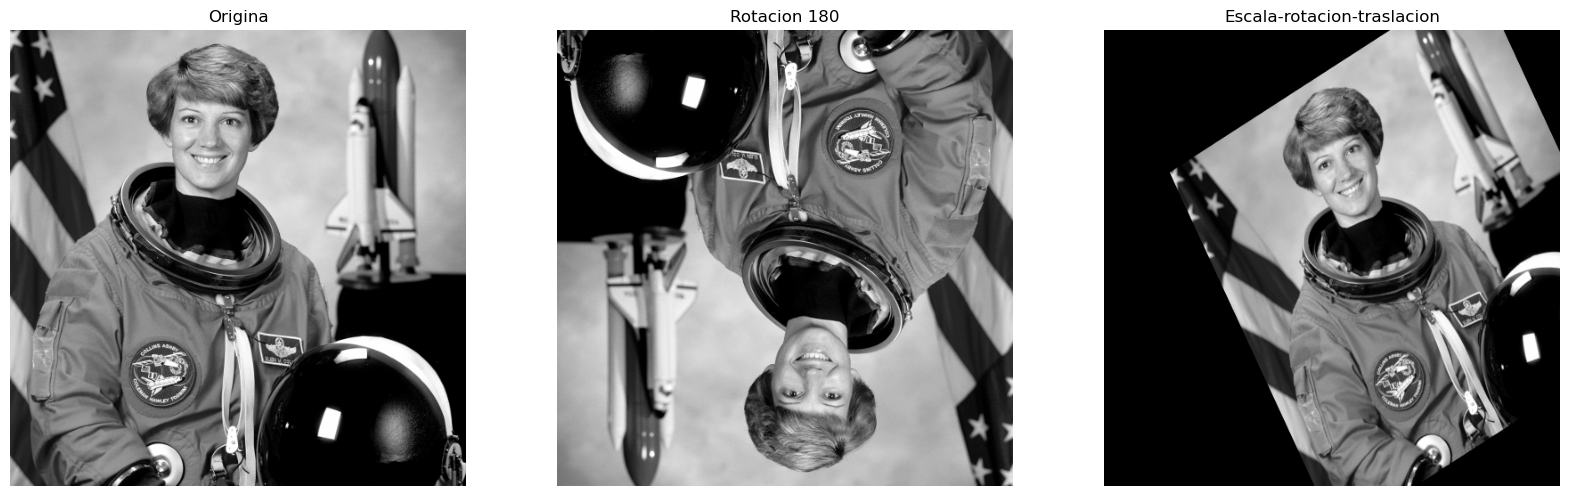

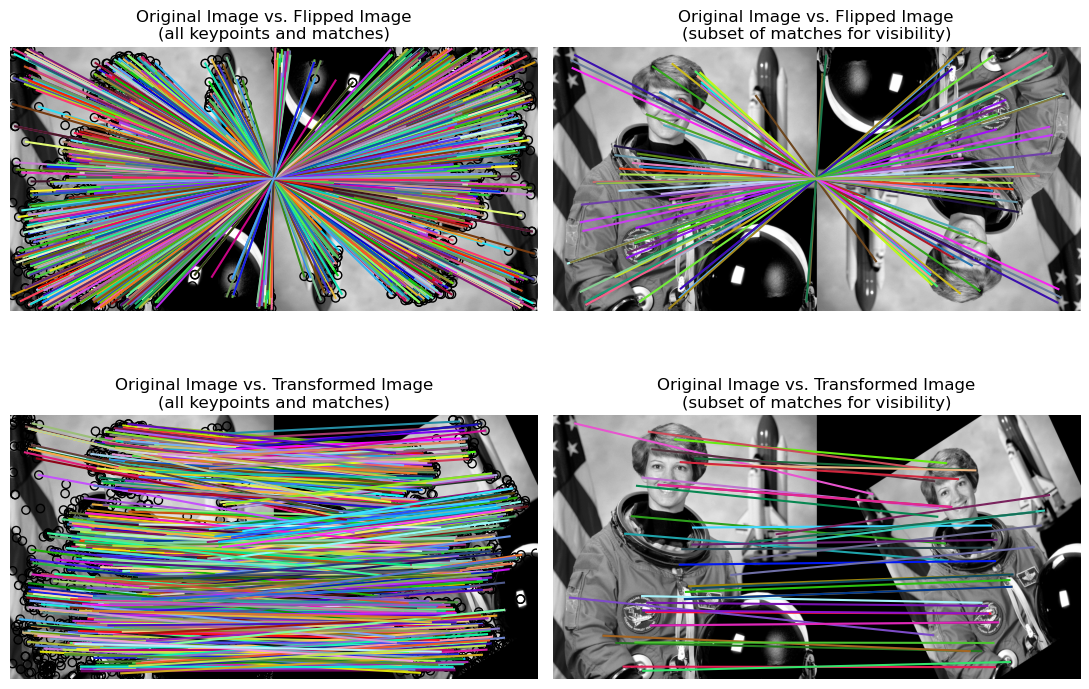

In [30]:
img1 = color.rgb2gray( data.astronaut() )
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, tform)

show([img1, img2, img3], ['Origina', 'Rotacion 180', 'Escala-rotacion-traslacion'])

descriptor_extractor = feature.SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = feature.match_descriptors(descriptors1, descriptors2, max_ratio=0.6, cross_check=True)
matches13 = feature.match_descriptors(descriptors1, descriptors3, max_ratio=0.6, cross_check=True)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))
plt.gray()

feature.plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n"
                   "(all keypoints and matches)")

feature.plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off')
ax[1, 0].set_title("Original Image vs. Transformed Image\n"
                   "(all keypoints and matches)")

feature.plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15], only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")

feature.plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15], only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")

plt.tight_layout() # ajusta la separacion entre subimágenes
plt.show()

In [33]:
print(keypoints1.shape)
print(descriptors1.shape)
print(keypoints1[:10,:])



(1234, 2)
(1234, 128)
[[ 16  44]
 [ 17 230]
 [ 20 220]
 [ 20 257]
 [ 21 250]
 [ 22 224]
 [ 23 212]
 [ 23 238]
 [ 23 255]
 [ 24 221]]


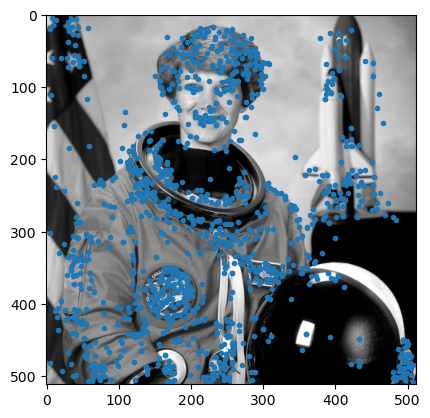

In [34]:
plt.imshow(img1)
plt.plot(keypoints1[:,1], keypoints1[:,0], 'o', markersize=3)